<a href="https://colab.research.google.com/github/MarAmorosMtz/SamsungInnovationCampus/blob/main/TensorFlowModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

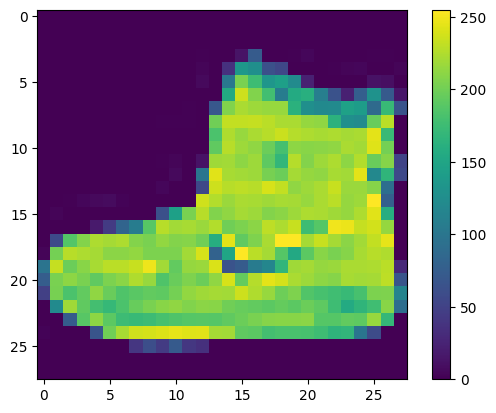

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

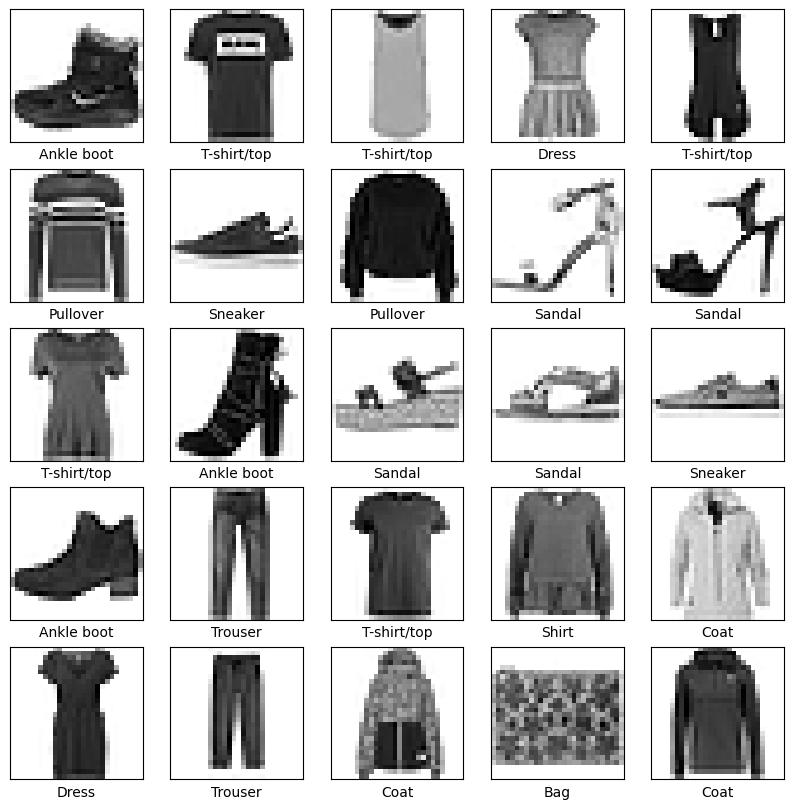

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7826 - loss: 0.6332
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8615 - loss: 0.3832
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8746 - loss: 0.3407
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8844 - loss: 0.3166
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8919 - loss: 0.2937
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8976 - loss: 0.2766
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9043 - loss: 0.2566
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9075 - loss: 0.2471
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9099 - loss: 0.2392


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8876 - loss: 0.3260
Test accuracy:  0.8876000046730042


In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.5150112e-08, 2.8012951e-11, 3.4760975e-10, 2.9408431e-11,
       4.1648379e-10, 1.0473770e-03, 5.3564403e-08, 7.8778071e-03,
       1.1431399e-07, 9.9107456e-01], dtype=float32)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7532 - loss: 0.6923 - val_accuracy: 0.8480 - val_loss: 0.4306
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8478 - loss: 0.4122 - val_accuracy: 0.8565 - val_loss: 0.3957
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.3697 - val_accuracy: 0.8694 - val_loss: 0.3668
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8736 - loss: 0.3462 - val_accuracy: 0.8687 - val_loss: 0.3575
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8772 - loss: 0.3374 - val_accuracy: 0.8701 - val_loss: 0.3532
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8811 - loss: 0.3205 - val_accuracy: 0.8770 - val_loss: 0.3465
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8819 - loss: 0.3158 - val_accuracy: 0.8763 - val_loss: 0.3423
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8884 - loss: 0.29

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:',test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8803 - loss: 0.3368
Test accuracy: 0.880299985408783


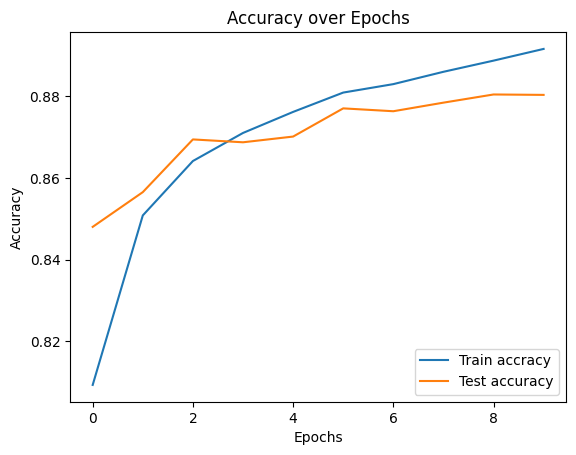

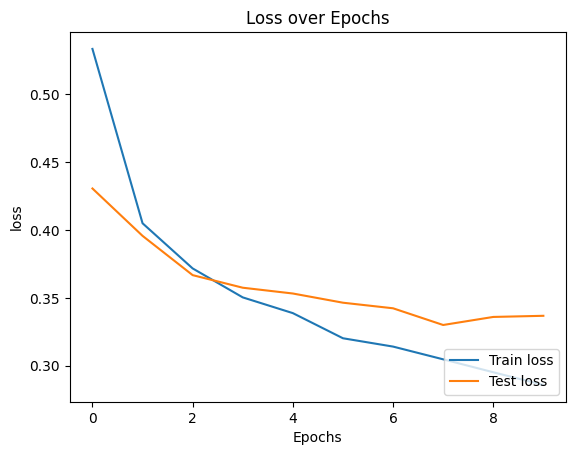

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train accracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.title('Loss over Epochs')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


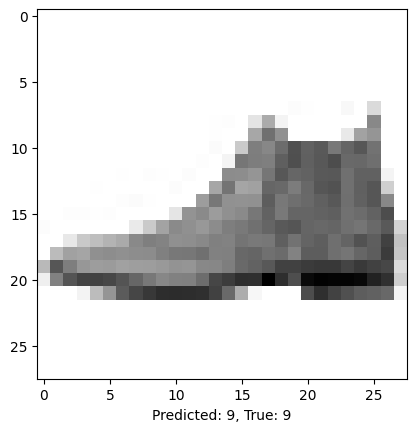

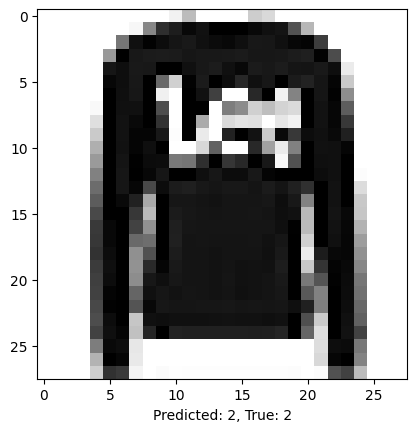

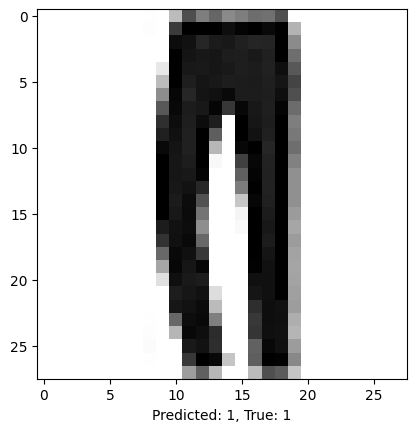

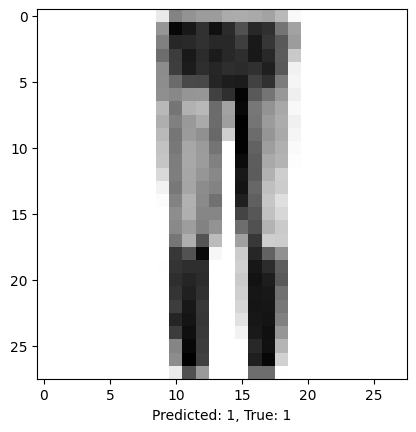

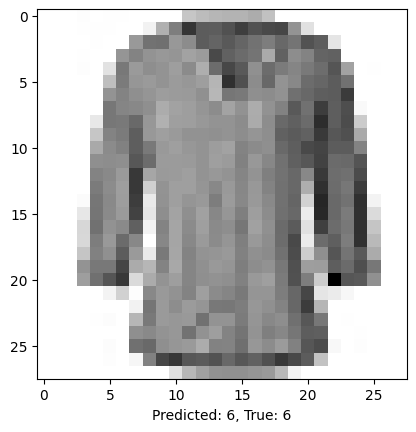

In [35]:
predictions = model.predict(test_images)

for i in range(5):
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")
  plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7537 - loss: 0.6885 - val_accuracy: 0.8434 - val_loss: 0.4306
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8495 - loss: 0.4134 - val_accuracy: 0.8606 - val_loss: 0.3851
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8607 - loss: 0.3765 - val_accuracy: 0.8646 - val_loss: 0.3816
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8658 - loss: 0.3593 - val_accuracy: 0.8622 - val_loss: 0.3748
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8735 - loss: 0.3369 - val_accuracy: 0.8642 - val_loss: 0.3652
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8800 - loss: 0.3243 - val_accuracy: 0.8720 - val_loss: 0.3510
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8836 - loss: 0.3085 - val_accuracy: 0.8758 - val_loss: 0.3490
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8863 - loss: 0.301

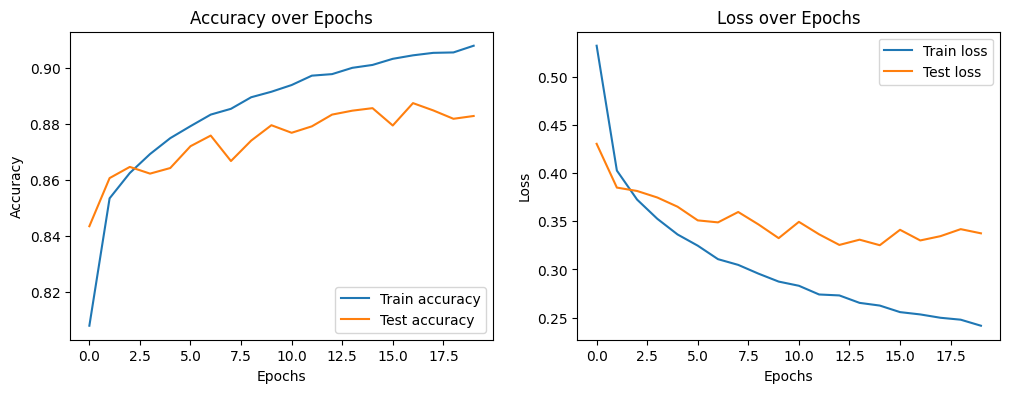

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


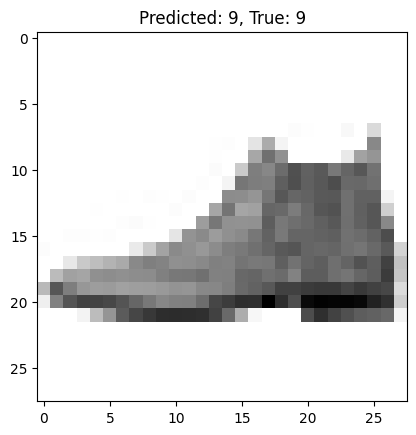

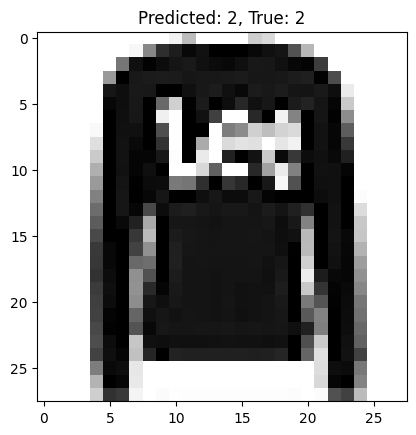

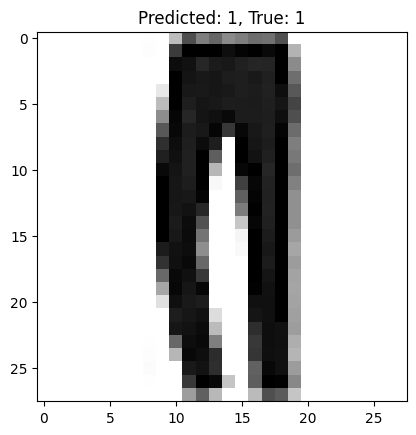

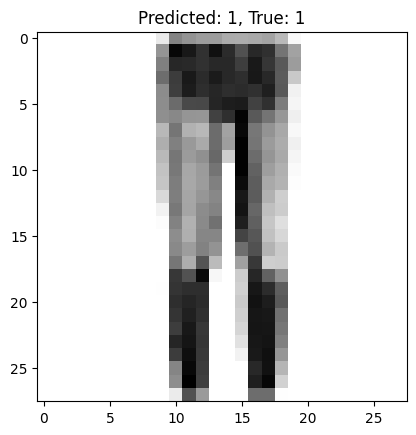

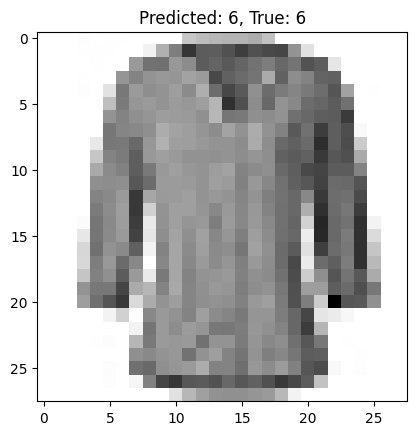

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar datos
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

# Mejorar el modelo con más capas y Dropout para evitar sobreajuste
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplana las imágenes de 28x28 a un vector de 784
    tf.keras.layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y ReLU
    tf.keras.layers.Dropout(0.2),  # Dropout con una tasa del 20% para prevenir sobreajuste
    tf.keras.layers.Dense(64, activation='relu'),  # Otra capa oculta con 64 neuronas
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase)
])

# Compilación del modelo
model.compile(optimizer='adam',  # Usamos Adam como optimizador
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # 'from_logits=False' porque usamos Softmax
              metrics=['accuracy'])

# Entrenar el modelo durante más épocas
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy over Epochs')

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss over Epochs')

plt.show()

# Realizar predicciones y mostrar ejemplos de imágenes con las etiquetas predichas
predictions = model.predict(test_images)

# Mostrar algunas predicciones junto con las imágenes
for i in range(5):  # Mostrar las primeras 5 imágenes
    plt.imshow(test_images[i], cmap=plt.cm.binary)  # Mostrar la imagen en escala de grises
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {test_labels[i]}")  # Mostrar predicción vs. etiqueta real
    plt.show()